In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('hamspam.tsv' , sep="\t")

In [3]:
df.columns=['label','news']

In [4]:
df1=df.copy()

In [5]:
df1.head()

,label,news
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [6]:
val=df1.label.value_counts()

<BarContainer object of 2 artists>

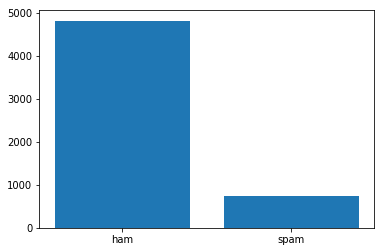

In [7]:
plt.bar(val.index,val.get_values())

In [8]:
df1.label.value_counts().index

Index(['ham', 'spam'], dtype='object')

In [9]:
df1.label=df1.label.apply(lambda x: 1 if x=='ham' else 0)

## Ham = 1  Spam = 0

In [10]:
df1.head(10)

,label,news
0,0,Free entry in 2 a wkly comp to win FA Cup fina...
1,1,"Nah I don't think he goes to usf, he lives aro..."
2,1,Even my brother is not like to speak with me. ...
3,1,I HAVE A DATE ON SUNDAY WITH WILL!!
4,1,As per your request 'Melle Melle (Oru Minnamin...
5,0,WINNER!! As a valued network customer you have...
6,0,Had your mobile 11 months or more? U R entitle...
7,1,I'm gonna be home soon and i don't want to tal...
8,0,"SIX chances to win CASH! From 100 to 20,000 po..."
9,0,URGENT! You have won a 1 week FREE membership ...


In [11]:
x=df1.news.values
y=df1.label

In [12]:
x1=df1.news
y1=df1.label

In [16]:
y1

0       0
1       1
2       1
3       1
4       1
5       0
6       0
7       1
8       0
9       0
10      0
11      1
12      1
13      1
14      0
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      0
       ..
5537    1
5538    1
5539    1
5540    1
5541    1
5542    0
5543    1
5544    1
5545    1
5546    1
5547    1
5548    1
5549    1
5550    1
5551    1
5552    1
5553    1
5554    1
5555    1
5556    1
5557    1
5558    1
5559    1
5560    1
5561    0
5562    0
5563    1
5564    1
5565    1
5566    1
Name: label, Length: 5567, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

# counter vectorizer

In [18]:
count_vect=CountVectorizer(stop_words="english")

In [19]:
count_train=count_vect.fit_transform(x_train)

In [20]:
x_train_converted=count_vect.transform(x_train)

# Descision tree model

In [21]:
model=DecisionTreeClassifier()

In [22]:
model.fit(x_train_converted,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
x_test_converted=count_vect.transform(x_test)

In [24]:
prediction=model.predict(x_test_converted)

In [25]:
accuracy_score(prediction,y_test)*100

97.66606822262118

## Testing

In [26]:
msg="hi you won the phone"

In [27]:
msg=count_vect.transform(["hi"])

In [28]:
model.predict(msg)

array([1])